<a href="https://colab.research.google.com/github/NBK-code/Demonstrations/blob/main/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## 1-Variable Model

In [6]:
df_new = df[['movie_facebook_likes', 'imdb_score']]

In [7]:
df_new

,movie_facebook_likes,imdb_score
0,33000,7.9
1,0,7.1
2,85000,6.8
3,164000,8.5
4,0,7.1
...,...,...
5038,84,7.7
5039,32000,7.5
5040,16,6.3
5041,660,6.3


In [8]:
df_new.isna().sum()

movie_facebook_likes    0
imdb_score              0
dtype: int64

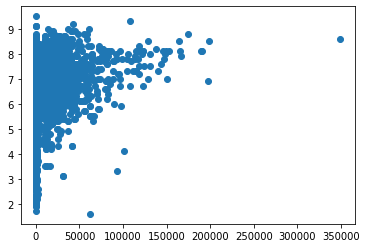

In [9]:
plt.scatter(df_new['movie_facebook_likes'], df_new['imdb_score'])

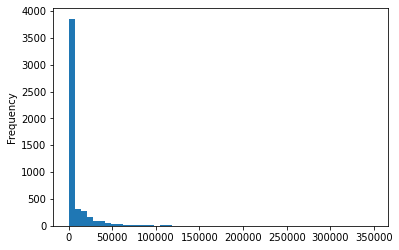

In [10]:
df['movie_facebook_likes'].plot(kind = 'hist', bins = 50)

In [11]:
X = df_new['movie_facebook_likes'].to_numpy().reshape(-1,1)
X.shape

(5043, 1)

In [12]:
y = df_new['imdb_score'].to_numpy()
y.shape

(5043,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [15]:
from xgboost import XGBRegressor

In [16]:
model = XGBRegressor()

In [17]:
model.fit(X_train, y_train)

[18:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [18]:
predictions = model.predict(X_test)

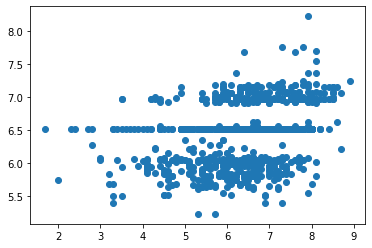

In [19]:
plt.scatter(y_test, predictions)

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
model2 = XGBRegressor()

In [22]:
hyperparameter_grid = {'n_estimators': [100, 200, 300],
                       'max_depth': [2, 4, 6, 8, 10],
                       'learning_rate': [0.0001, 0.001, 0.01]
                       }

In [23]:
random_cv = RandomizedSearchCV(model2,
                               param_distributions= hyperparameter_grid,
                               cv = 5)

In [24]:
random_cv.fit(X_train, y_train)

[18:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300]})

In [25]:
random_cv.best_estimator_

XGBRegressor(learning_rate=0.01, max_depth=6, n_estimators=300)

In [26]:
xgb_regressor = XGBRegressor(learning_rate=0.01, max_depth=2, n_estimators=200)

In [27]:
xgb_regressor.fit(X_train, y_train)

[18:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=2, n_estimators=200)

In [28]:
predictions = xgb_regressor.predict(X_test)

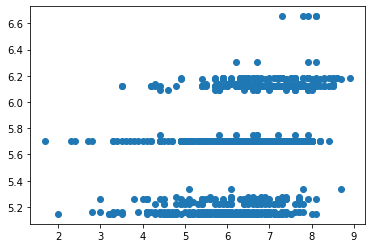

In [29]:
plt.scatter(y_test, predictions)

##2-Variable Model

In [30]:
df_2 = df[['movie_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'imdb_score']]

In [31]:
df_2

,movie_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,imdb_score
0,33000,1000.0,936.0,855.0,7.9
1,0,40000.0,5000.0,1000.0,7.1
2,85000,11000.0,393.0,161.0,6.8
3,164000,27000.0,23000.0,23000.0,8.5
4,0,131.0,12.0,NaN,7.1
...,...,...,...,...,...
5038,84,637.0,470.0,318.0,7.7
5039,32000,841.0,593.0,319.0,7.5
5040,16,0.0,0.0,0.0,6.3
5041,660,946.0,719.0,489.0,6.3


In [32]:
df_2.isna().sum()

movie_facebook_likes       0
actor_1_facebook_likes     7
actor_2_facebook_likes    13
actor_3_facebook_likes    23
imdb_score                 0
dtype: int64

In [33]:
df_2 = df_2.dropna()

In [34]:
df_2.isna().sum()

movie_facebook_likes      0
actor_1_facebook_likes    0
actor_2_facebook_likes    0
actor_3_facebook_likes    0
imdb_score                0
dtype: int64

In [35]:
df_2.mean()

movie_facebook_likes      7554.729681
actor_1_facebook_likes    6577.876693
actor_2_facebook_likes    1655.028287
actor_3_facebook_likes     645.009761
imdb_score                   6.440478
dtype: float64

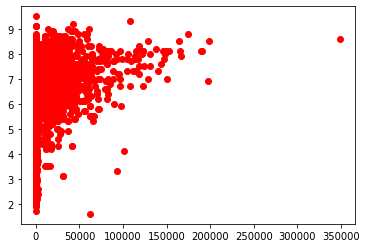

In [36]:
plt.scatter(df_2['movie_facebook_likes'], df_2['imdb_score'], c='red')

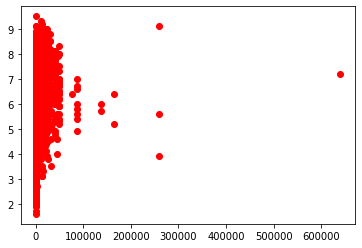

In [37]:
plt.scatter(df_2['actor_1_facebook_likes'], df_2['imdb_score'], c='red')

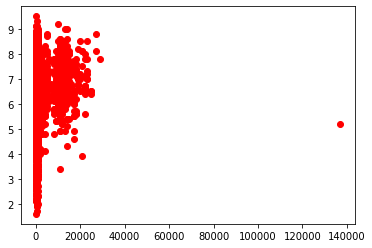

In [38]:
plt.scatter(df_2['actor_2_facebook_likes'], df_2['imdb_score'], c='red')

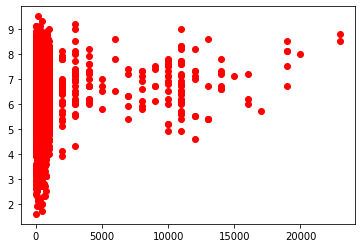

In [39]:
plt.scatter(df_2['actor_3_facebook_likes'], df_2['imdb_score'], c='red')

Each plot exhibits heteroscedasticity.

In [40]:
X = df_2[['movie_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].to_numpy()

In [41]:
X.shape

(5020, 4)

In [42]:
y = df_2['imdb_score'].to_numpy()
y.shape

(5020,)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [45]:
X_test.shape

(1004, 4)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scale = StandardScaler()

In [48]:
X_train = scale.fit_transform(X_train)

In [49]:
X_train

array([[ 1.43306838,  0.86487277, -0.17701497, -0.06404845],
       [ 0.16907221,  1.25121437, -0.32110174, -0.21042845],
       [-0.35877258, -0.38320378, -0.36698011, -0.33030343],
       ...,
       [-0.3870861 , -0.40438818, -0.33758928, -0.35741084],
       [-0.3870861 ,  0.47853116, -0.16004953,  0.14257023],
       [-0.3870861 , -0.4188116 , -0.38824665, -0.38753018]])

In [50]:
X_test = scale.transform(X_test)

In [51]:
X_test

array([[ 8.26350220e-01, -3.58542307e-01, -2.76657062e-01,
        -2.74883840e-01],
       [-3.87086097e-01, -4.15398913e-01, -3.93981447e-01,
        -3.83313469e-01],
       [-3.87086097e-01,  9.21895623e-02, -1.60049526e-01,
         1.47991714e-01],
       ...,
       [-3.87086097e-01,  1.12243383e+00,  3.18524863e+00,
         6.23450824e+00],
       [-3.87086097e-01,  7.36092232e-01, -1.60049526e-01,
         2.10639945e-01],
       [ 8.26350220e-01,  4.78531164e-01, -2.40336682e-01,
         5.82842257e-03]])

In [52]:
from xgboost import XGBRegressor

In [53]:
model2 = XGBRegressor()

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
hyperparameter_grid = {'n_estimators': [100, 200, 300, 400],
                       'max_depth': [2,4,6,8,10,12],
                       'learning_rate': [0.001, 0.01, 0.1, 0.5]}

In [56]:
random_cv = RandomizedSearchCV(model2,
                               param_distributions = hyperparameter_grid,
                               cv = 5)

In [57]:
random_cv.fit(X_train, y_train)

[18:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.5],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                        'n_estimators': [100, 200, 300, 400]})

In [58]:
random_cv.best_estimator_

XGBRegressor(max_depth=2)

In [59]:
best_model = XGBRegressor(max_depth=6)

In [60]:
best_model.fit(X_train, y_train)

[18:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6)

In [61]:
predictions = best_model.predict(X_test)

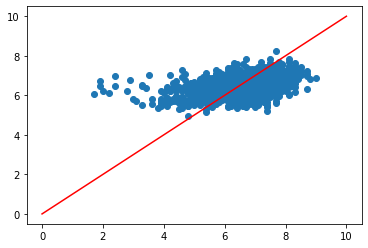

In [62]:
x_data = [0.0,10.0]
plt.scatter(y_test, predictions)
plt.plot(x_data, x_data, color = 'red', label = 'x=y')

In [63]:
mse = np.mean((predictions - y_test)**2)

In [64]:
mse

1.0791165752668836

##Visualizations

In [65]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [66]:
df_2.describe()

,movie_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,imdb_score
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,7554.729681,6577.876693,1655.028287,645.009761,6.440478
std,19358.311661,15040.324477,4045.797559,1665.041728,1.124582
min,0.000000,0.000000,0.000000,0.000000,1.600000
25%,0.000000,617.750000,282.000000,133.000000,5.800000
50%,167.000000,989.000000,595.000000,371.500000,6.600000
75%,3000.000000,11000.000000,919.000000,636.000000,7.200000
max,349000.000000,640000.000000,137000.000000,23000.000000,9.500000


In [68]:
df_new

,movie_facebook_likes,imdb_score
0,33000,7.9
1,0,7.1
2,85000,6.8
3,164000,8.5
4,0,7.1
...,...,...
5038,84,7.7
5039,32000,7.5
5040,16,6.3
5041,660,6.3


([<matplotlib.axis.XTick at 0x7fca9911d250>,
 [Text(0, 0, 'imdb'), Text(0, 0, 'fb_likes')])

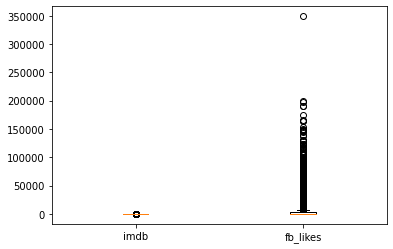

In [75]:
plt.boxplot([df_new['imdb_score'], df_new['movie_facebook_likes']])
plt.xticks([1,2],['imdb','fb_likes'])

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
normalize = StandardScaler()

In [78]:
X_train_ = normalize.fit_transform(X_train)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca98e810d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca990c1f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca98e40b10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fca98fb6950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fca98fb66d0>,
 'means': []}

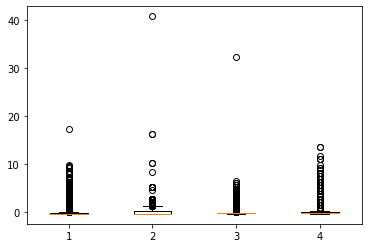

In [80]:
plt.boxplot(X_train_)

In [81]:
df_new.isna().sum()

movie_facebook_likes    0
imdb_score              0
dtype: int64

In [89]:
df_new_ = df[['gross','budget']]

In [90]:
df_new_.isna().sum()

gross     884
budget    492
dtype: int64

In [91]:
df_new_['gross'] = df_new_['gross'].fillna(df_new_['gross'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
df_new_.isna().sum()

gross       0
budget    492
dtype: int64

In [94]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [96]:
df_3 = df[['genres','color','content_rating', 'movie_facebook_likes', 'actor_1_facebook_likes', 'imdb_score']]

In [97]:
df_3

,genres,color,content_rating,movie_facebook_likes,actor_1_facebook_likes,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,Color,PG-13,33000,1000.0,7.9
1,Action|Adventure|Fantasy,Color,PG-13,0,40000.0,7.1
2,Action|Adventure|Thriller,Color,PG-13,85000,11000.0,6.8
3,Action|Thriller,Color,PG-13,164000,27000.0,8.5
4,Documentary,NaN,NaN,0,131.0,7.1
...,...,...,...,...,...,...
5038,Comedy|Drama,Color,NaN,84,637.0,7.7
5039,Crime|Drama|Mystery|Thriller,Color,TV-14,32000,841.0,7.5
5040,Drama|Horror|Thriller,Color,NaN,16,0.0,6.3
5041,Comedy|Drama|Romance,Color,PG-13,660,946.0,6.3


In [98]:
df_3.isna().sum()

genres                      0
color                      19
content_rating            303
movie_facebook_likes        0
actor_1_facebook_likes      7
imdb_score                  0
dtype: int64

In [99]:
df_3['genres'].value_counts()

Drama                                         236
Comedy                                        209
Comedy|Drama                                  191
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Crime|Drama|Mystery|Sci-Fi|Thriller             1
Adventure|Comedy|Crime|Drama                    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Comedy|Crime|Horror                             1
Name: genres, Length: 914, dtype: int64

In [104]:
df_3.dropna(subset = ['content_rating'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [105]:
df_3.isna().sum()

genres                     0
color                     13
content_rating             0
movie_facebook_likes       0
actor_1_facebook_likes     1
imdb_score                 0
dtype: int64

In [108]:
df_3.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [109]:
df_3.isna().sum()

genres                    0
color                     0
content_rating            0
movie_facebook_likes      0
actor_1_facebook_likes    0
imdb_score                0
dtype: int64

In [110]:
df_3

,genres,color,content_rating,movie_facebook_likes,actor_1_facebook_likes,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,Color,PG-13,33000,1000.0,7.9
1,Action|Adventure|Fantasy,Color,PG-13,0,40000.0,7.1
2,Action|Adventure|Thriller,Color,PG-13,85000,11000.0,6.8
3,Action|Thriller,Color,PG-13,164000,27000.0,8.5
5,Action|Adventure|Sci-Fi,Color,PG-13,24000,640.0,6.6
...,...,...,...,...,...,...
5036,Crime|Drama,Color,PG-13,4,45.0,7.8
5037,Comedy|Drama,Color,Not Rated,413,296.0,6.4
5039,Crime|Drama|Mystery|Thriller,Color,TV-14,32000,841.0,7.5
5041,Comedy|Drama|Romance,Color,PG-13,660,946.0,6.3


In [121]:
df_3.loc[(df_3['genres'] == 'Action') & (df_3['color'] == 'Color') & (df_3['content_rating'] == 'R')]

,genres,color,content_rating,movie_facebook_likes,actor_1_facebook_likes,imdb_score
2697,Action,Color,R,29000,746.0,5.4
2740,Action,Color,R,0,64.0,6.2
2814,Action,Color,R,1000,149.0,6.9
2885,Action,Color,R,107,683.0,5.1
3433,Action,Color,R,689,981.0,4.2
4782,Action,Color,R,62,472.0,4.3


In [126]:
df_3

,genres,color,content_rating,movie_facebook_likes,actor_1_facebook_likes,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,Color,PG-13,33000,1000.0,7.9
1,Action|Adventure|Fantasy,Color,PG-13,0,40000.0,7.1
2,Action|Adventure|Thriller,Color,PG-13,85000,11000.0,6.8
3,Action|Thriller,Color,PG-13,164000,27000.0,8.5
5,Action|Adventure|Sci-Fi,Color,PG-13,24000,640.0,6.6
...,...,...,...,...,...,...
5036,Crime|Drama,Color,PG-13,4,45.0,7.8
5037,Comedy|Drama,Color,Not Rated,413,296.0,6.4
5039,Crime|Drama|Mystery|Thriller,Color,TV-14,32000,841.0,7.5
5041,Comedy|Drama|Romance,Color,PG-13,660,946.0,6.3


In [131]:
pd.concat([pd.get_dummies(df_3['color'])[[' Black and White', 'Color']], df_3.drop(['color'], axis = 1)], axis = 1)

,Black and White,Color,genres,content_rating,movie_facebook_likes,actor_1_facebook_likes,imdb_score
0,0,1,Action|Adventure|Fantasy|Sci-Fi,PG-13,33000,1000.0,7.9
1,0,1,Action|Adventure|Fantasy,PG-13,0,40000.0,7.1
2,0,1,Action|Adventure|Thriller,PG-13,85000,11000.0,6.8
3,0,1,Action|Thriller,PG-13,164000,27000.0,8.5
5,0,1,Action|Adventure|Sci-Fi,PG-13,24000,640.0,6.6
...,...,...,...,...,...,...,...
5036,0,1,Crime|Drama,PG-13,4,45.0,7.8
5037,0,1,Comedy|Drama,Not Rated,413,296.0,6.4
5039,0,1,Crime|Drama|Mystery|Thriller,TV-14,32000,841.0,7.5
5041,0,1,Comedy|Drama|Romance,PG-13,660,946.0,6.3
